# Homework

##### Dataset

In this homework, we will use the Bank Marketing dataset (https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposit or not.

In [20]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold

In [2]:
# loading the temp.zip and creating a zip object 
with ZipFile("C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_3\\Homework\\bank+marketing.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall(path="C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_3\\Homework\\temp") 

with ZipFile("C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_3\\Homework\\temp\\bank.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall(path="C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_3\\Homework\\temp") 

df = pd.read_csv('C:\\Users\\Sandra\\Documents\\Cursos\\MLZoomcamp2024\\Lesson_3\\Homework\\temp\\bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##### Features
For the rest of the homework, you'll need to use only these columns:

1) age,
2) job,
3) marital,
4) education,
5) balance,
6) housing,
7) contact,
8) day,
9) month,
10) duration,
11) campaign,
12) pdays,
13) previous,
14) poutcome,
15) y

##### Data preparation

Select only the features from above.

Check if the missing values are presented in the features.

In [3]:
base = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_num = df[base]

In [4]:
print("Columns with NaN: ", df_num.isnull().any()) 

Columns with NaN:  age          False
job          False
marital      False
education    False
balance      False
housing      False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


In [5]:
df_num['y'] = df_num['y'].map({'yes': 1, 'no': 0})
df_num

C:\Users\Sandra\AppData\Local\Temp\ipykernel_924\2720032529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['y'] = df_num['y'].map({'yes': 1, 'no': 0})


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [6]:
df_full_train, df_test = train_test_split(df_num, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [7]:
categorical = ['job', 'marital', 'education','housing', 'contact', 'month', 'poutcome']

numerical = ['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']

#### Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

1) balance
2) day
3) **duration**
4) previous

In [8]:
for i in numerical:
    auc = roc_auc_score(y_train,df_train[i])
    if auc < 0.5:
        auc = roc_auc_score(y_train,-df_train[i])
    print('%9s, %.3f' % (i,auc))

      age, 0.509
  balance, 0.590
      day, 0.527
 duration, 0.814
 campaign, 0.571
    pdays, 0.591
 previous, 0.599


#### Question 2

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

1) **0.69**
2) 0.79
3) 0.89
4) 0.99

In [9]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [10]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

auc = np.round(roc_auc_score(y_val, y_pred),3)
print(f'AUC score = {auc}')

AUC score = 0.652


#### Question 3

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

At which threshold precision and recall curves intersect?

1) 0.265
2) **0.465**
3) 0.665
4) 0.865

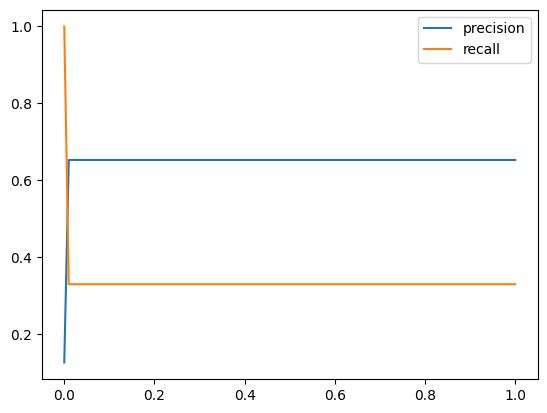

In [14]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold,df_scores.p,label='precision')
plt.plot(df_scores.threshold,df_scores.r,label='recall')
plt.legend()
plt.show()

#### Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

1) 0.02
2) 0.22
3) **0.42**
4) 0.62

In [16]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

print(df_scores.f1.max())

0.43813682678311505


#### Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

1) 0.0001
2) **0.006**
3) 0.06
4) 0.26

In [24]:
def train(df,y,C=1.0):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train,y_train)
    
    return dv,model

In [25]:
def predict(df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [21]:
!pip install tqdm

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


In [22]:
from tqdm.auto import tqdm

In [27]:
dv, model = train(df_train,y_train)

y_pred = predict(df_val,dv,model)

kfold = KFold(n_splits=5,shuffle=True,random_state=1)

scores = []
for train_idx,val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.y.values
    y_val = df_val.y.values
    
    dv,model = train(df_train,y_train)
    y_pred = predict(df_val,dv,model)
    
    auc =roc_auc_score(y_val,y_pred)
    scores.append(auc)
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))



0it [00:00, ?it/s]

0.906 +- 0.006


#### Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.000001, 0.001, 1]
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

1) **0.000001**
2) 0.001
3) 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [33]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []
    for train_idx,val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.y.values
        y_val = df_val.y.values
        
        dv,model = train(df_train,y_train)
        y_pred = predict(df_val,dv,model)
        
        auc =roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print('C= %.6f --> %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


0it [00:00, ?it/s]

C= 0.000001 --> 0.906 +- 0.006


0it [00:00, ?it/s]

C= 0.001000 --> 0.906 +- 0.006


0it [00:00, ?it/s]

C= 1.000000 --> 0.906 +- 0.006
